In [115]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go

# 1.Równania Lotki-Volterry

In [116]:
def lotka_volterra3D(t,state, a, b, c):
    x, y, z = state
    dx_dt = x*(a[0] + y*b[0] + z*c[0])
    dy_dt = y*(a[1] + x*b[1] + z*c[1])
    dz_dt = z*(a[2] + x*b[2] + y*c[2])
    return [dx_dt, dy_dt, dz_dt]

# 2.Parametry układu

In [117]:
#parametry zależności
a = [1, -0.5, -0.3]
b = [0.5, -0.2, -0.15]
c =[-0.5, 0.4, 0.1]

#stan początkowy
initial_state = [1.0, 1.0, 1.0]

# Przedział czasu symulacji i kroki
start_time = 0.0
end_time = 200.0
num_points = 100000

# Przygotowanie osi czasu
time = np.linspace(start_time, end_time, num_points)


# 3. Rozwiązanie numeryczne układu

In [ ]:
#najprostszą metodą bez zbytnich fajerwerków
solution = solve_ivp(
    lotka_volterra3D,
    [start_time, end_time],
    initial_state,
    t_eval=time,
    args=(a, b, c),
    method='RK45'
)

# Ekstrakcja wyników
x, y, z = solution.y

# 4. Wykres trajektorii

In [ ]:
# Create interactive 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(color='blue', width=2)
)])

fig.update_layout(
    title="Interactive 3D Lotka-Volterra Trajectory",
    width=1200,   # Width in pixels
    height=900,  # Height in pixels
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)

fig.show()

# 5. Wykładnik Łapunowa

In [90]:
time = np.linspace(0, 200, 100000)

In [88]:
from math import *
def calculate_max_lyapunov_exp(initial_state, time, delta=10**(-10)/3**(0.5)):
    nudged_state = initial_state + np.array([1,1,1])*delta
    solution0 = solution = solve_ivp(
    lotka_volterra3D,
    [time[0], time[-1]],
    initial_state,
    t_eval=time,
    args=(a, b, c),
    method='RK45'
    )
    solution1 = solution = solve_ivp(
    lotka_volterra3D,
    [time[0], time[-1]],
    nudged_state,
    t_eval=time,
    args=(a, b, c),
    method='RK45'
    )
    x0, y0, z0 = solution0.y
    states0 = np.stack((x0, y0, z0), axis=1)
    x1, y1, z1 = solution1.y
    states1 = np.stack((x1, y1, z1), axis=1)
    dists = np.zeros(len(time))
    for i in range(len(time)):
        dists[i] = np.linalg.norm(states0[i]-states1[i])
    log_dists = np.log(dists)
    fig = go.Figure(data = go.Scatter(x=time, y=log_dists,mode='lines',
    line=dict(color='blue', width=2)))
    fig.update_layout(
    title="Plot of log(dist) of 2 points initially separated infinitesimally ",
    width=800,   # Width in pixels
    height=600,  # Height in pixels
        xaxis_title="t",
        yaxis_title="log(dist)"
)
fig.show()
    
    
    

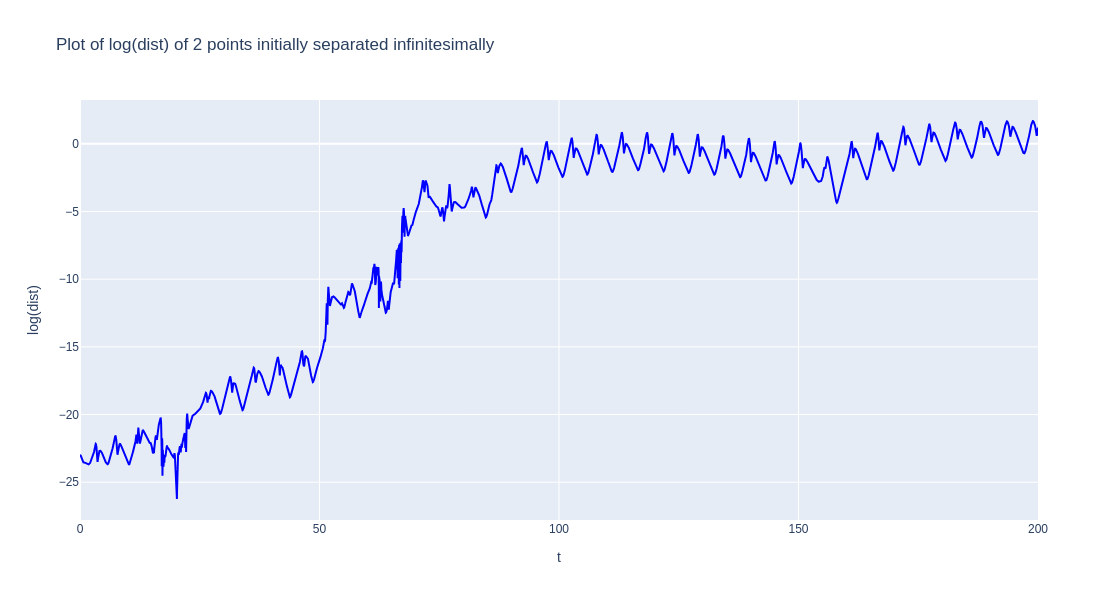

In [91]:
calculate_max_lyapunov_exp(initial_state, time)

In [54]:
solution.t

array([0.00000000e+00, 5.00050005e-03, 1.00010001e-02, ...,
       4.99899990e+01, 4.99949995e+01, 5.00000000e+01], shape=(10000,))

In [55]:
lis = [1, 2, 3, 4, 5]

In [61]:
print(time)

[0.00000000e+00 5.00050005e-03 1.00010001e-02 ... 4.99899990e+01
 4.99949995e+01 5.00000000e+01]


In [75]:
x = np.array([1,2,3])
y = np.array([4,5,6])
z = np.array([7,8,9])
razem = np.stack((x, y, z), axis=1)

In [65]:
razem[0]

array([1, 4, 7])

In [66]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [78]:
np.log(x)

array([0.        , 0.69314718, 1.09861229])